In [22]:
# Load the data set

import pandas as pd
import numpy as np


train_data = pd.read_csv('./data/train.csv')
# TEST_DATA = pd.read_csv('./data/test.csv')

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [131]:
from collections import OrderedDict
import json
data_fields = OrderedDict()


def add_component(key):
    k,*v = key.split(': ')
    data_fields[k] = {
        'description': v[0],
        'components':{}
    }

    while '   ' in content[0]:
#         print(_)
        enrich_component(k, content.pop(0))
        if len(content)==0:
            break
    
    return k


def enrich_component(key, value:str):
    if value == "":
        return
    _ = value.strip().split(":")
    k,v = _[0],_[1]
    data_fields[key]['components'][k.upper()]=v.strip()

with open('./data/data_description.md', 'r') as f:
    content = list(f.readlines())
    _content = map(lambda i:i.replace('\n','').replace('\t\t','').replace('\t',': '),content)
    _content = filter(lambda j:j!=''and j!=': ', _content)
    content = list(_content)
#     pprint(content)
    while len(content)>0:
        current_k = add_component(content.pop(0))
#         print(current_k)
        
        if len(content)==0:
            break
            
def show_fields():
    for k in data_fields.keys():
        print(f'{k}\t–\tDescription: {data_fields[k]["description"]}')
        if len(data_fields[k]['components'])>0:
            print('Components\n', *list(f'\t- {i}: {j}\n' for i,j in data_fields[k]['components'].items()))
        print('============')


In [94]:
#show_fields()

# Shared Functions

Field: BldgType
Description: Type of dwelling
Components
 - 1FAM: Single-family Detached
 - 2FMCON: Two-family Conversion; originally built as one-family dwelling
 - DUPLEX: Duplex
 - TWNHSE: Townhouse End Unit
 - TWNHS: Townhouse Inside Unit



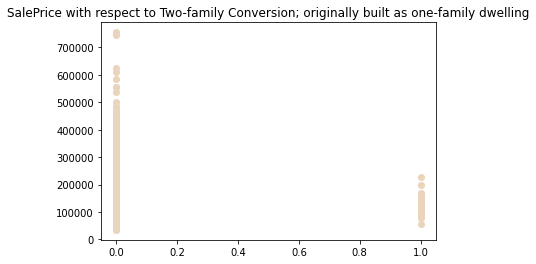

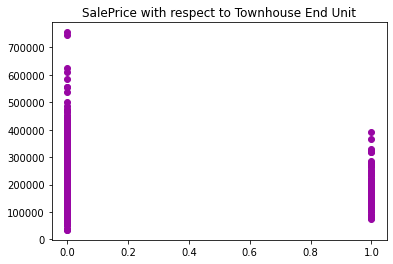

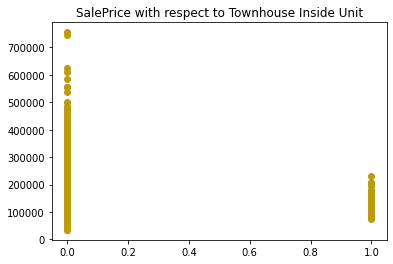

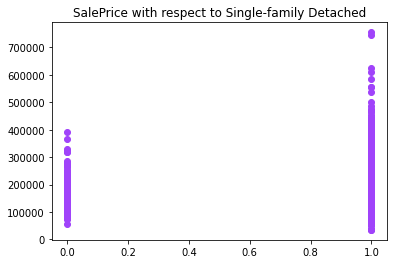

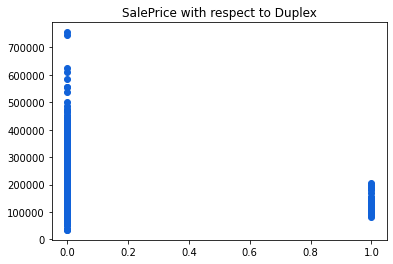

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pprint import pprint
import random


def get_color(existing_color=[])->str:
    r = lambda: random.randint(0,255)
    _color = '#%02X%02X%02X' % (r(),r(),r())
    _ = get_color(existing_color) if _color in existing_color else _color
    existing_color.append(_)
    return _

def plot_with_category(x_field:str, y_field:str='SalePrice'):
    y = train_data[y_field]
    x = pd.get_dummies(train_data[x_field])
    category = list(set(x.columns))
#     print(category, data_fields[x_field]["components"])
    chosen_color = []

    for c in category:
        # Plot outputs
        plt.scatter(x[c], y,  color=get_color(chosen_color))
        plt.title(label=f'{y_field} with respect to {data_fields[x_field]["components"][c.upper()]}')
#         plt.title(label=f'{y_field} with respect to {c}')
        # plt.plot(x, y, color='blue', linewidth=3)
        plt.show()

def pure_plot(x_field:str, y_field:str='SalePrice'):
    # Plot outputs
    plt.scatter(train_data[x_field], train_data[y_field],  color=get_color())
#     plt.plot(x, y, color='blue', linewidth=3)
    plt.show()
    
    
def plot(x_field:str, y_field:str='SalePrice'):
    print(f'Field: {x_field}\nDescription: {data_fields[x_field]["description"]}')
    print('Components\n', *list(f'- {i}: {j}\n' for i,j in data_fields[x_field]['components'].items()))
    plot_with_category(x_field, y_field) if is_string_dtype(train_data[x_field].dtype) else pure_plot(x_field, y_field)
plot('BldgType')

Field: BldgType
Description: Type of dwelling
Components
 - 1Fam: Single-family Detached:
 - 2FmCon: Two-family Conversion; originally built as one-family dwelling
 - Duplx: Duplex
 - TwnhsE: Townhouse End Unit
 - TwnhsI: Townhouse Inside Unit



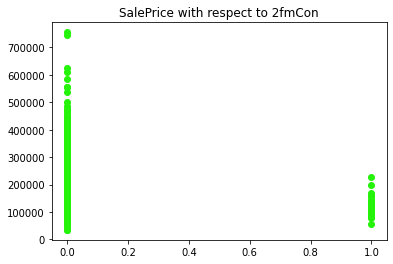

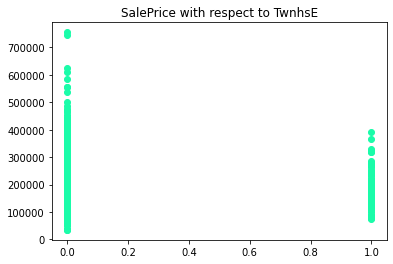

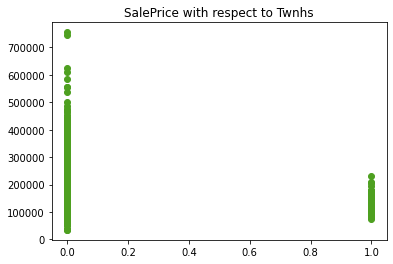

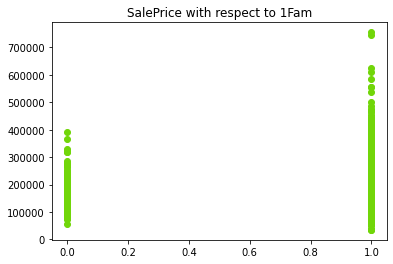

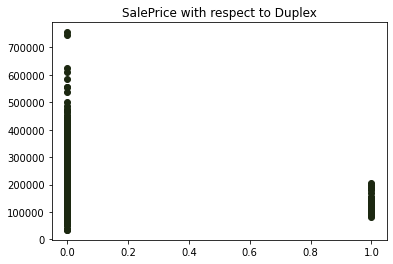

In [82]:

plot('BldgType')